참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengege Learning, 2013.

`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)

In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import matplotlib.patches as patches  # 도형 그리기 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import sympy.plotting as splot
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비

## 단면 2차 모멘트<br>Second Moment of Inertia (Area Moment of Inertia)

단면 2차 모멘트 $I$ 는 보의 굽힘 응력 등 공학 계산에서 자주 나타난다.<br>Second moment of inertia $I$ appears frequently in engineering calculations such as bending stress of a beam.

수평 축에 대한 $I$ 는 다음과 같다.<br>The definition of $I$ about a horizontal axis is as follows.

$$
I=\int_A y^2 dA
$$

여기서 $y$는 회전축으로부터의 $dA$ 까지의 수직 거리이다.<br>where $y$ is distance from the rotation axis to $dA$.

### 사각단면의 예<br>A Rectangular Section

#### 도심에 관한 단면 2차 모멘트<br>2nd moment of inertia about centroid

다음과 같이 폭이 $b$ 이고 높이가 $h$ 인 사각 단면의 예를 들어 생각해 보자.<br>Let's think about a rectangular section with base $b$ and height $h$ as follows.

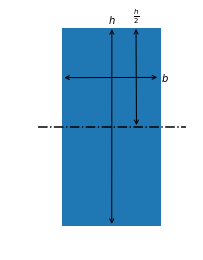

In [2]:
import draw_diagrams
draw_diagrams.rect_section()

이 단면은 상하 대칭으로 도심의 위치는 $\frac{h}{2}$ 이다.<br> 
This section is horizontally symmetric; thus cetroid is at $\frac{h}{2}$.

단면 2차 모멘트의 정의를 다시 한번 생각해보자.<br>
Let's recall the definition of the second moment of inertia.

$$
\begin{align}
I=\int_A y^2 dA
\end{align}
$$

$dA$에 관하여, 미소 면적 $b\cdot dy$를 생각할 수 있다.<br>
Regarding $dA$, one can think about an infinitesimal area $b\cdot dy$.

$$
dA=b \cdot dy
$$

도심을 지나는 수평축에 관한 단면 2차 모멘트는 다음과 같다.<br>
Second moment of inertia about a horizontal axis passing the centroid is as follows.

$$
\begin{align}
I&=\int_{y=-\frac{h}{2}}^{y=\frac{h}{2}}y^2\cdot b\cdot dy \\
&=b\int_{y=-\frac{h}{2}}^{y=\frac{h}{2}}y^2\cdot dy \\
&=b \left[ \frac{1}{3}y^3 \right] _{y=-\frac{h}{2}}^{y=\frac{h}{2}} \\
&=\frac{b}{3} \left[ \left( \frac{h}{2} \right)^3 - \left( -\frac{h}{2} \right)^3 \right]\\
&=\frac{b}{3} \left[ \frac{h^3}{8} - \left( - \frac{h^3}{8}\right) \right]\\
&=\frac{b}{3} \frac{h^3}{4} = \frac{bh^3}{12}\\
\end{align} \\
$$

`sympy` 로는 다음과 같이 구할 수 있다.<br>It is as follows in `sympy`.

In [3]:
b, h, y = sy.symbols('b, h, y', real=True)
I = sy.integrate(b * y**2, (y, -h/2, h/2))

In [4]:
I

#### $c$ 점 중심의 단면 2차 모멘트와 평행축 정리<br>About coordiante c and Parallel axis theorm

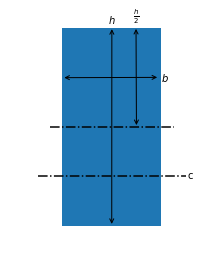

In [5]:
import draw_diagrams
draw_diagrams.rect_section_c()

$c$ 로부터 미소면적 $dA$ 까지의 거리 $z$는 다음과 같이 정의된다.<br>
$z$, the distance from $c$ to the infinitesimal area $dA$, is defined as follows.

$$
z=y-c
$$

단면 2차 모멘트의 정의는 같다.<br>
The definition of the second moment of inertia is the same.

$$
\begin{align}
I_c=\int_A z^2 dA
\end{align}
$$

$dA$는 $b\cdot dz$이다.<br>
$dA$ is 
$b\cdot dz$.

$z$ 를 $y$로 미분한다.<br>Differetiating $z$ with $y$ gives follows.

$$
\begin{align}
\frac{dz}{dy} &= 1 \\
dz &= dy \\
dA &=b \cdot dz \\
 &=b \cdot dy
\end{align}
$$

$z$ 대신 $y$ 에 대한 적분은 다음과 같다.<br>
Integrating about $y$ instead of $z$ gives follows.

$$
\begin{align}
I_c&=\int_{y=-\frac{h}{2}}^{y=\frac{h}{2}} (y-c)^2 \cdot b \cdot dy \\
&=b\int_{y=-\frac{h}{2}}^{y=\frac{h}{2}} (y-c)^2 \cdot dy \\
&=b \left[ \frac{1}{3} (y-c)^3   \right]_{y=-\frac{h}{2}}^{y=\frac{h}{2}} \\
&=\frac{b}{3} \left[  \left(\frac{h}{2}-c\right)^3  - \left(\left(-\frac{h}{2}\right)-c\right)^3  \right] \\
&=\frac{b}{3} \left[  \left(\frac{h}{2}-c\right)^3  + \left(\frac{h}{2}+c\right)^3  \right] \\
\end{align}
$$

대괄호 안은 다음과 같다.<br>Inside of the bracket is as follows.

$$
\begin{align} 
\left(\frac{h}{2}-c\right)^3 & = \left(\frac{h}{2}\right)^3 
                               - 3\left(\frac{h}{2}\right)^2 c
                               + 3\left(\frac{h}{2}\right) c^2
                               - c^3
\\
\left(\frac{h}{2}+c\right)^3 & = \left(\frac{h}{2}\right)^3 
                               + 3\left(\frac{h}{2}\right)^2 c
                               + 3\left(\frac{h}{2}\right) c^2
                               + c^3
\\
\left(\frac{h}{2}-c\right)^3 + \left(\frac{h}{2}+c\right)^3 &= 2 \left(\frac{h}{2}\right)^3 + 6 \left(\frac{h}{2}\right) c^2 \\
&= 2 \frac{h^3}{8} + 3h c^2 \\ 
&= \frac{h^3}{4} + 3h c^2 \\
\end{align}
$$

그렇다면 $I$ 는 <br>Then $I$ becomes

$$
\begin{align}
I_c&=\frac{b}{3} \left[  \left(\frac{h}{2}-c\right)^3  + \left(\frac{h}{2}+c\right)^3  \right] \\
&=\frac{b}{3} \left[  \frac{h^3}{4} + 3h c^2 \right] \\
&=\frac{bh^3}{12} + bhc^2 \\
&=I+Ac^2
\end{align}
$$

`sympy` 로는 다음과 같이 구할 수 있다.<br>It is as follows in `sympy`.

In [6]:
b, h, c, y = sy.symbols('b, h, c, y', real=True)
I_C = sy.integrate(b * (y - c)**2, (y, -h/2, h/2))

In [7]:
I_C

(이 노트북이 중간 오류 없이 끝까지 실행 되었는지 확인)<br>
(Check if this notebook could run to the end without errors in the middle.)

In [8]:
assert True